<h1><center>IMT2240 Ciencia de Datos Responsable</center></h1>
<h2><center>Taller 2 (Sumativo): Preprocesamiento de datos - Métricas</center></h2>
<h3><center>28 de marzo, 2023</center></h3>

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Introducción: Métricas de Fairness

Las métricas de fairness se refieren a un conjunto de medidas que se utilizan para evaluar cuantitativamente la equidad de los modelos de aprendizaje automático. Las métricas de fairness se utilizan para medir la equidad de un modelo en función de diferentes atributos sensibles, como la raza, el género o la edad. Así, estas métricas buscan asegurarse de que el modelo no esté sesgado y no discrimine a ciertos grupos de personas o individuos. 

Recordemos algunos conceptos básicos de clasificación:

- **True Positive (TP)**: Casos en los que el modelo predice correctamente la clase positiva, es decir, la clase que se desea detectar o identificar.<br></br>

- **False Positive (FP)**: Casos en los que el modelo predice incorrectamente la clase positiva, es decir, predice que algo es positivo cuando en realidad es negativo.<br></br>

- **True Negative (TN)**: Casos en los que el modelo predice correctamente la clase negativa.<br></br>

- **False Negative (FN)**: Casos en los que el modelo predice incorrectamente la clase negativa, es decir, predice que algo es negativo cuando en realidad es positivo.

En base a estos conceptos, se definen las siguientes métricas:

- **False Negative Rate (FNR)**: Mide la proporción de casos positivos que son incorrectamente clasificados como negativos.

$$\text{FNR} = \frac{\text{FN}}{\text{FN + TP}}$$

- **False Positive Rate (FPR)**: Mide la proporción de casos negativos que son incorrectamente clasificados como positivos.

$$\text{FPR} = \frac{\text{FP}}{\text{FP + TN}}$$


- **False Omission Rate (FOR)**: Mide la proporción de casos clasificados como negativos que son incorrectos.

$$\text{FOR} = \frac{\text{FN}}{\text{FN + TN}}$$

- **False Discovery Rate (FDR)**: Mide la proporción de casos clasificados como positivos que son incorrectos.

$$\text{FOR} = \frac{\text{FP}}{\text{FP + TP}}$$

Estas métricas son importantes para evaluar la equidad y la justicia en los modelos de ciencia de datos, y para la detección de sesgos y discriminación. Supongamos que se ha construido un modelo de ciencia de datos para predecir si un paciente tiene una enfermedad cardíaca o no (ver taller pasado). El modelo utiliza datos de pacientes anteriores y se entrena para predecir la presencia de la enfermedad. ¿Qué nos indicarían las métricas en dicho contexto?

- **False Negative Rate (FNR)**:  Una FNR alta significa que muchos pacientes con la enfermedad cardíaca son incorrectamente clasificados como no enfermos, lo que puede llevar a que no reciban el tratamiento que necesitan y poner su salud en riesgo. Por otro lado, una FNR baja significa que el modelo es más preciso en detectar a los pacientes que tienen la enfermedad cardíaca.<br></br>

- **False Positive Rate (FPR)**: Una FPR alta significa que muchos pacientes sin la enfermedad cardíaca son incorrectamente clasificados como enfermos, lo que puede llevar a pruebas y tratamientos innecesarios, y a la posibilidad de causarles estrés y ansiedad innecesarios. Por otro lado, una FPR baja significa que el modelo es más preciso en identificar a los pacientes que no tienen la enfermedad cardíaca.<br></br>

- **False Omission Rate (FOR)**: Una FOR alta significa que el modelo tiene una alta proporción de pacientes clasificados como no enfermos, que en realidad sí lo están.<br></br>

- **False Discovery Rate (FDR)**: Una FDR alta significa que el modelo tiene una alta proporción de pacientes clasificados como enfermos, que en realidad no lo están.<br></br>


# Evaluación

Este taller se divide en dos partes. 

Primero, deberán realizar la limpieza, pre-procesamiento y análisis descriptivo de datos de riesgo crediticio alemanes, similar a lo que se hizo en el taller 1. El desarrollo de esta parte es de carácter abierto: Realice la limpieza y pre-procesamiento de la forma que ud. crea más adecuada, e incluya los análisis e insights que usted estime relevante. Explique sus razonamientos. El objetivo es que desarrollen sus habilidades exploratorias en el contexto de la ciencia de datos responsable. Pueden basarse en el taller anterior.

En la segunda parte del taller, deberán calcular las métricas introducidas en este taller para el caso de COMPAS, que también vimos en el taller anterior. 

# Parte 1: German Credit Risk.

Las exigencias generales son las siguientes:

- Overview de los datos.
- Verificar datos duplicados.
- Verificar datos faltantes.
- Identificar atributos categóricos y numéricos. Formatear según sea necesario.
- Analizar la variable objetivo (risk). ¿Qué pasa con esta variable dentro de los distintos grupos? Incluya visualizaciones.
- Visualice las variables categóricas y numéricas.


In [28]:
german = pd.read_csv('data/german_credit_data.csv')
german.drop(columns=['Unnamed: 0'], inplace= True)
german.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [29]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [30]:
german['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

Veamos una descripción general de datos:


- Age: Edad en años.
- Sex: Genero (male = Hombre, female = Mujer) 
- Job: Tipo de trabajo ( [0, 1, 2, 3] No se especifica a qué corresponde cada trabajo)
- Housing: Vivienda (own = Vivienda propia, rent = Arrendando vivienda, free = Sin vivienda propia)
- Saving accounts: Cuenta de ahorro (little = poco ahorro, moderate = ahorro moderado, quite rich = buen ahorro, rich = mucho ahorro)
- Checking account: Centa corriente(little = poco ahorra, moderate = ahorro moderado, rich = mucho ahorro)
- Credit amount: Cantidad de Crédito 
- Duration: Tiempo del crédito
- Purpose: Propósito del crédito
- Risk: Riesgo del crédito (good or bad)

In [31]:
german.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [32]:
## Continúe como ud. estime necesario.
german.drop_duplicates(inplace=True, ignore_index=True)
german

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


Vemos que no hay datos duplicados.

In [33]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Vemos que en estas las columnas Saving accounts y Checking account, presentan más del 50% de valores nulos, por lo que quitaremos estas columnas.

In [34]:
german.dropna('index', inplace=True)
german

C:\Users\matia\AppData\Local\Temp\ipykernel_6292\96742304.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  german.dropna('index', inplace=True)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


Ahora transformaremos las columnas no numéricas en variables categoricas.

In [35]:
categorias = ['Sex', 'Housing', 'Purpose', 'Risk']
for cat in categorias:
    german[cat] = german[cat].astype('category')
german.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               522 non-null    int64   
 1   Sex               522 non-null    category
 2   Job               522 non-null    int64   
 3   Housing           522 non-null    category
 4   Saving accounts   522 non-null    object  
 5   Checking account  522 non-null    object  
 6   Credit amount     522 non-null    int64   
 7   Duration          522 non-null    int64   
 8   Purpose           522 non-null    category
 9   Risk              522 non-null    category
dtypes: category(4), int64(4), object(2)
memory usage: 31.3+ KB


### Empecemos analizando los datos.

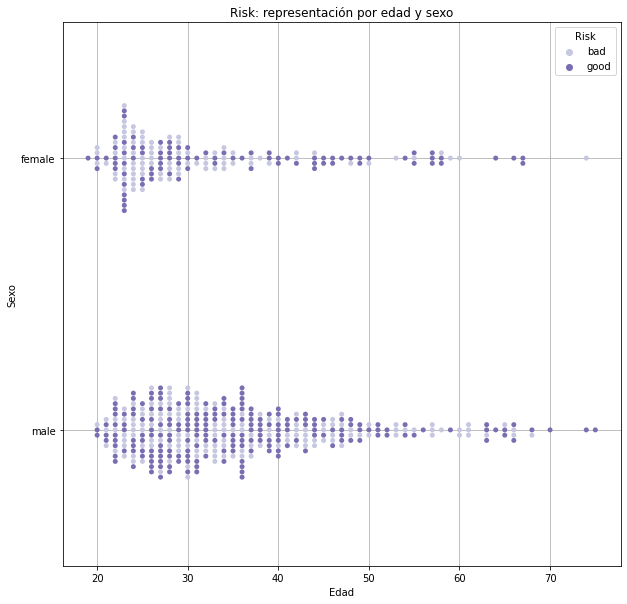

In [36]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.swarmplot(data=german, x='Age', y='Sex', hue='Risk', palette='Purples')
plt.title('Risk: representación por edad y sexo')
plt.grid()
ax.set_xlabel('Edad')
ax.set_ylabel('Sexo')
plt.show()

Podemos ver que hay más datos de hombres que de mujeres y que la mayoría de los datos de mujeres están en el rango de edad de los 20 a los 30 años, en cambio la mayoría de los datos de hombres se encuantra en el rango de edad de los 25 a los 40 años.

### Veamos el riesgo segun edad y sexo:

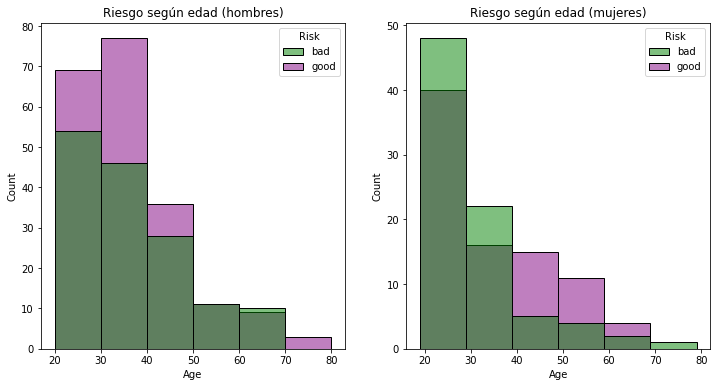

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=german[german['Sex'] == 'male'], x='Age', binwidth=10, ax=ax[0],
             hue='Risk', palette=['green', 'purple'])
sns.histplot(data=german[german['Sex'] == 'female'], x='Age', binwidth=10, ax=ax[1],
             hue='Risk', palette=['green', 'purple'])

ax[0].set_title('Riesgo según edad (hombres)')
ax[1].set_title('Riesgo según edad (mujeres)')

plt.show()

Podemos ver que si vemos el Riesgo mediante la edad y el sexo, que en ambos sexos prevalece a que a más edad el riesgo (good or bad) va disminuyendo y que que a menor edad hay mayor riesgo, tanto good risk como bad risk, que mayor edad, osea, que la población más joven tiende apedir más creditos que la población con mayor edad.

Algo interesante a notar es que en los datos de las mujeres hay mayor cantidad de casos de créditos con un bad risk entre los 20 y 40 años que créditos con un good risk. Al igual que, entre los 20 y 30 años las mujeres tieden a tomár más créditos que los hombres, en cambio entre los 30 y 40 años, los hombres tienden a tomar más créditos con un good risk que las mujeres.

### Ahora veamos el Riesgo dependiendo del trabajo que poseen y el sexo:

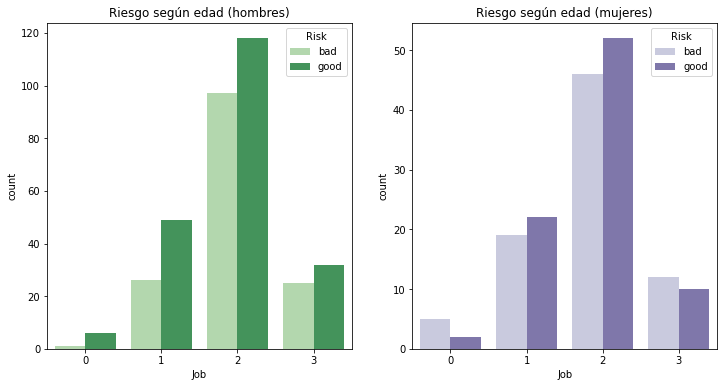

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=german[german['Sex'] == 'male'], x='Job', ax=ax[0],
             hue='Risk', palette='Greens')
sns.countplot(data=german[german['Sex'] == 'female'], x='Job', ax=ax[1],
             hue='Risk', palette='Purples')

ax[0].set_title('Riesgo según edad (hombres)')
ax[1].set_title('Riesgo según edad (mujeres)')

plt.show()

Podemos ver que las personas que están en el trabajo 2, toman más créditos y prefieren un crédito con un good risk. El trabajo 0, es el que menor créditos toma.
### Vemos el Riesgo dependiendo del propósito y sexo:

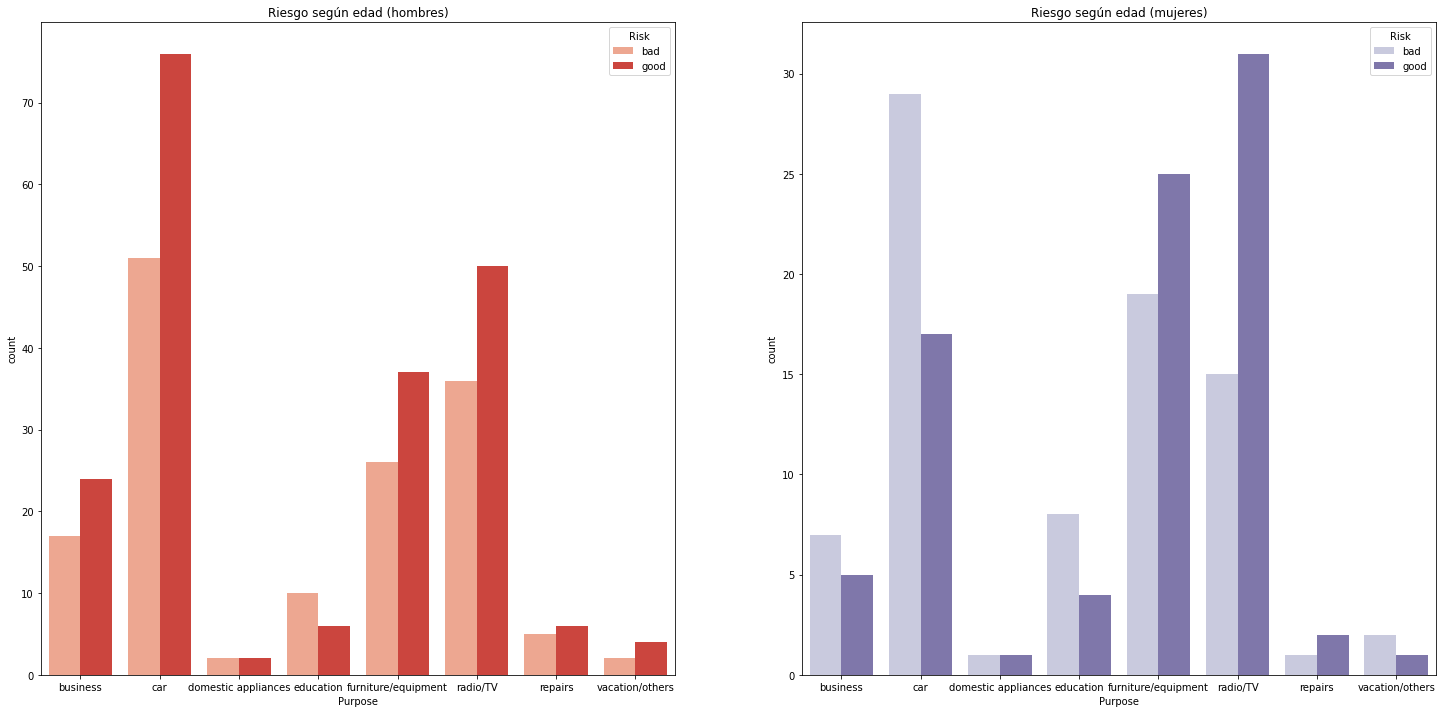

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(25, 12))

sns.countplot(data=german[german['Sex'] == 'male'], x='Purpose', ax=ax[0],
             hue='Risk', palette='Reds')
sns.countplot(data=german[german['Sex'] == 'female'], x='Purpose', ax=ax[1],
             hue='Risk', palette='Purples')

ax[0].set_title('Riesgo según edad (hombres)')
ax[1].set_title('Riesgo según edad (mujeres)')

plt.show()

Podemos ver que, tanto hombre como mujeres, buscan tomar un crédito para obtener un auto o una radio/TV o para artículos mobiliarios. Y vemos que las mujeres tienden a tomár más créditos con un bad risk para comprarse un auto que para otros propósitos.

### Veamos el Riesgo dependiendo de alojamiento posee y por sexo:

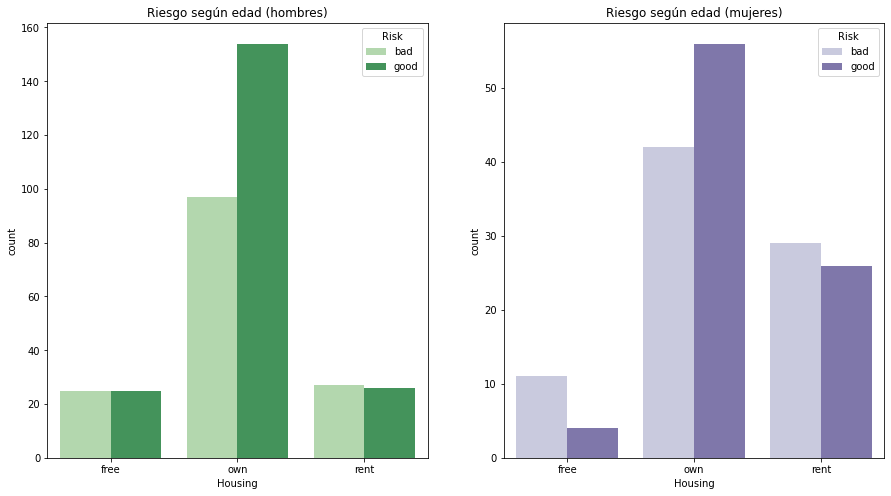

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.countplot(data=german[german['Sex'] == 'male'], x='Housing', ax=ax[0],
             hue='Risk', palette='Greens')
sns.countplot(data=german[german['Sex'] == 'female'], x='Housing', ax=ax[1],
             hue='Risk', palette='Purples')

ax[0].set_title('Riesgo según edad (hombres)')
ax[1].set_title('Riesgo según edad (mujeres)')

plt.show()

Vemos que la mayoría de las personas poseen una casa propia, toman créditos con un good risk más que un bad risk. Y que las mujeres que no poseen casa propia tienden a tomar créditos con bad risk.

Como pudimos ver en todo grupo, en la población alemana las mujeres tienden a tomar más créditos que los hombres y tienden a optar por créditos con un bad risk que a uno con good risk. Que en general la población alemana opta a créditos para comprar más bienes materiales que para otros propósitos. Y que, al tener una casa propia la gente tiende a pedir más créditos.

# Parte 2: COMPAS

## A. Repita el procedimiento que realizó para los datos de German Credit Disk. 

## B. Defina una nueva columna que indique si la clasificación de cierto registro corresponde a un TP, FP, TN, FN.

## C. Calcule las métricas de fairness a nivel grupal. Por ejemplo, para un grupo dado g, su $\text{FPR}_g$ corresponde a:

$$\begin{align*}\text{FPR}_g = \frac{\text{FP}_g}{\text{FP}_g + \text{TN}_g}\end{align*}$$

Considere sólo las categorias sexo y raza

## D. Elija dos métricas y reflexione acerca de las implicancias que tienen estas en el contexto dado.


In [41]:
compas = pd.read_csv('https://github.com/dssg/aequitas/raw/master/examples/data/compas_for_aequitas.csv')
display(compas.head())

,entity_id,score,label_value,race,sex,age_cat
0,1,0.0,0,Other,Male,Greater than 45
1,3,0.0,1,African-American,Male,25 - 45
2,4,0.0,1,African-American,Male,Less than 25
3,5,1.0,0,African-American,Male,Less than 25
4,6,0.0,0,Other,Male,25 - 45


### A. Repita el procedimiento que realizó para los datos de German Credit Disk. 

Veamos una descripción genral de los datos:

- entity_id: ID por persona
- score: Etiqueta que predice el algoritmo.
- label_value: Verdadera etiqueta de la persona.
- race: Raza (etnia) de la persona
- sex: Sexo de la persona
- age_cat: intervalo de edad de la persona.

Veamos si hay datos duplicados:

In [42]:
compas.duplicated().sum()

0

Vemos que no hay datos duplicados. Veamos si hay datos faltantes:

In [43]:
compas.isna().sum()

entity_id      0
score          0
label_value    0
race           0
sex            0
age_cat        0
dtype: int64

Vemos que no hay datos faltantes.

Transformaremos las columnas no numéricas a categóricas.

In [44]:
categorias = ['race', 'sex', 'age_cat']
for cat in categorias:
    compas[cat] = compas[cat].astype('category')
compas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   entity_id    7214 non-null   int64   
 1   score        7214 non-null   float64 
 2   label_value  7214 non-null   int64   
 3   race         7214 non-null   category
 4   sex          7214 non-null   category
 5   age_cat      7214 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 190.8 KB


Vemos la distribución de cada categoría:

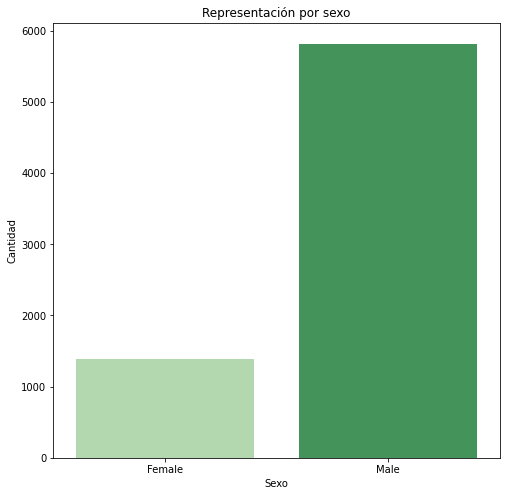

In [45]:
fig, ax = plt.subplots(1, figsize=(8, 8))
sns.countplot(data=compas, x='sex', palette='Greens')
plt.title('Representación por sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Cantidad')
plt.show()

Vemos que en la mayoria de los datos corresponden a hombres, y que la difencia con la cantidad de datos de mujes es demasiado grande.

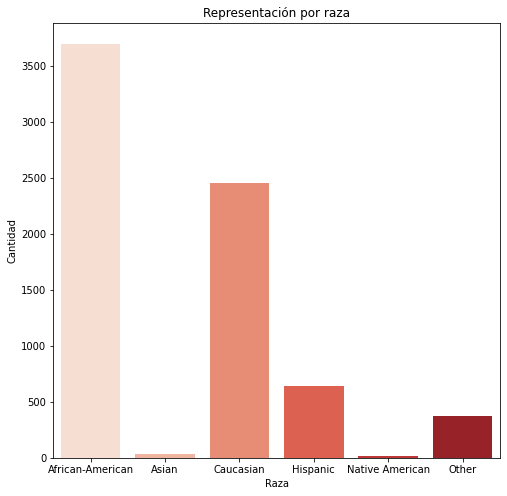

In [46]:
# Representación: variable sex

fig, ax = plt.subplots(1, figsize=(8, 8))
sns.countplot(data=compas, x='race', palette='Reds')
plt.title('Representación por raza')
ax.set_xlabel('Raza')
ax.set_ylabel('Cantidad')
plt.show()

Vemos que hay una desproporcionalidad en la cantidad de datos entregados, siendo que hay más de 3.500 datos de personas Afroamericanas y menos de 250 datos de personas asiaticas y nativo-americanas. 

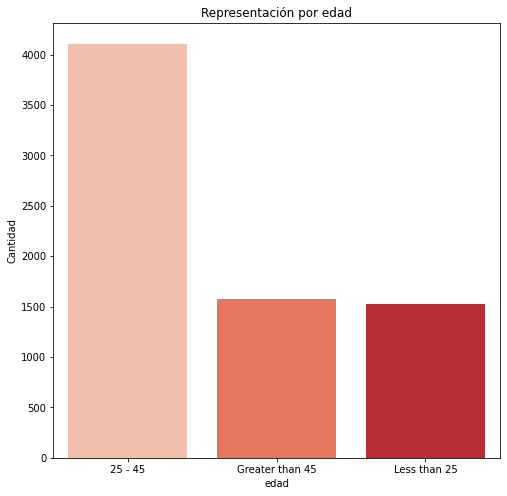

In [47]:
fig, ax = plt.subplots(1, figsize=(8, 8))
sns.countplot(data=compas, x='age_cat', palette='Reds')
plt.title('Representación por edad')
ax.set_xlabel('edad')
ax.set_ylabel('Cantidad')
plt.show()

Vemos que la cantidad de datos por intervalo de edad tiene una correcta proporción respecto a las otras categorías.

### B. Defina una nueva columna que indique si la clasificación de cierto registro corresponde a un TP, FP, TN, FN.


In [48]:
clasificacion = []
for i in range(len(compas)):
    if compas.iloc[i]['score'] == 0 and compas.iloc[i]['label_value'] == 0:
        clasificacion.append('TN')
    elif compas.iloc[i]['score'] == 1 and compas.iloc[i]['label_value'] == 0:
        clasificacion.append('FP')
    elif compas.iloc[i]['score'] == 0 and compas.iloc[i]['label_value'] == 1:
        clasificacion.append('FN')
    elif compas.iloc[i]['score'] == 1 and compas.iloc[i]['label_value'] == 1:
        clasificacion.append('TP')
compas['Clasificacion'] = clasificacion
compas

,entity_id,score,label_value,race,sex,age_cat,Clasificacion
0,1,0.0,0,Other,Male,Greater than 45,TN
1,3,0.0,1,African-American,Male,25 - 45,FN
2,4,0.0,1,African-American,Male,Less than 25,FN
3,5,1.0,0,African-American,Male,Less than 25,FP
4,6,0.0,0,Other,Male,25 - 45,TN
...,...,...,...,...,...,...,...
7209,10996,1.0,0,African-American,Male,Less than 25,FP
7210,10997,0.0,0,African-American,Male,Less than 25,TN
7211,10999,0.0,0,Other,Male,Greater than 45,TN
7212,11000,0.0,0,African-American,Female,25 - 45,TN


### C. Calcule las métricas de fairness a nivel grupal. Por ejemplo, para un grupo dado g, su $\text{FPR}_g$ corresponde a:

$$\begin{align*}\text{FPR}_g = \frac{\text{FP}_g}{\text{FP}_g + \text{TN}_g}\end{align*}$$

Considere sólo las categorias sexo y raza

### Veamos primero la categoría por sexo.

In [49]:
fprs = {}
for gen in compas['sex'].unique():
    df = compas[compas['sex'] == gen]
    df = df[['Clasificacion']]
    fpr = df[df['Clasificacion'] == 'FP'].count() / (df[df['Clasificacion'] == 'FP'].count() + df[df['Clasificacion'] == 'TN'].count())
    fpr = fpr['Clasificacion']
    fprs[gen] = round(fpr, 3)
fprs

{'Male': 0.324, 'Female': 0.321}

Vemos que el FPR de la categoría sexo, en hombres es del 0.32 y en mujeres es del 0.32. Vemos que el algoritmo clasifica al 32% mal, osea que clasificaba de posibles reincidentes criminales a quienes no los eran.

### Ahora veamoslo por la categoría raza:

In [50]:
fprs = {}
for race in compas['race'].unique():
    df = compas[compas['race'] == race]
    df = df[['Clasificacion']]
    fpr = df[df['Clasificacion'] == 'FP'].count() / (df[df['Clasificacion'] == 'FP'].count() + df[df['Clasificacion'] == 'TN'].count())
    fpr = fpr['Clasificacion']
    fprs[race] = round(fpr, 3)
fprs

{'Other': 0.148,
 'African-American': 0.448,
 'Caucasian': 0.235,
 'Hispanic': 0.215,
 'Native American': 0.375,
 'Asian': 0.087}

Vemos que el FPR de la raza Afro-Americana es de 0.45, osea que clasifica mal al 45% diciendo que si corresponden a criminales reincidentes cuando no lo son. De manera similar pasa con los Nativo-Americanos con el 38% y los Hispanos con el 20%. 

### D. Elija dos métricas y reflexione acerca de las implicancias que tienen estas en el contexto dado.

Tomemos la categoría edad y raza. Primero, veamos el FPR de la categoría edad.

In [51]:
fprs = {}
for race in compas['age_cat'].unique():
    df = compas[compas['age_cat'] == race]
    df = df[['Clasificacion']]
    fpr = df[df['Clasificacion'] == 'FP'].count() / (df[df['Clasificacion'] == 'FP'].count() + df[df['Clasificacion'] == 'TN'].count())
    fpr = fpr['Clasificacion']
    fprs[race] = round(fpr, 3)
fprs

{'Greater than 45': 0.168, '25 - 45': 0.334, 'Less than 25': 0.541}

Vemos que el algoritmo cataloga más mal a las personas menores a 25 años, con un porcentaje del 54%. Osea, que al ser una persona menor 25 años tiene mayor probabilidad de ser catalogado como un criminal reincidente.

Ahora veamos el FPR de las personas Afroamericanas menores a 25 años.

In [52]:
df = compas[compas['race'] == 'African-American']
df = df[df['age_cat'] == 'Less than 25']
df = df[['Clasificacion']]
fpr = df[df['Clasificacion'] == 'FP'].count() / (df[df['Clasificacion'] == 'FP'].count() + df[df['Clasificacion'] == 'TN'].count())
fpr = fpr['Clasificacion']
fpr

0.5988857938718662

Vemos que el porcentaje de mala clasificación a las personas Afroamericanas y que tienen menos de 25 años es del 60%, que es un porcentaje demasiado alto. Claramente vemos que estas dos categorías afectan demasiado al algoritmo, este está mal entrenado generando una gran discriminación hacia las personas Afroamericanas y que su edad también influye mucho. 